# Zadanie

Z populacji, w której badana cecha ma rozkład $N(\mu,4)$ wylosowano próbkę złożoną z $9$ obserwacji. Na poziomie istotności $\alpha=0.05$ zweryfikować hipotezę 

<ul>
<li> $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu <2$ </li>
<li> $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu > 2$ </li>
<li> $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu \neq 2$ </li>
</ul>

jeżeli średnia z punktów wynosi $\bar X = 1.4$.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

## Model 1.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b> znanym $\sigma$}</b>.

Weryfikujemy hipotezę:

$$
H_{0}: \mu = \mu_0
$$

$$
H_{1}: \mu = \mu_1 > \mu_0
$$


W tym teście używa się statystyki
$$
U=\frac{\bar X - \mu_0}{\sigma} \sqrt{n}
$$
Zbiór krytyczny jest dany za pomocą przedziału
$$
[u(1-\alpha), +\infty)
$$
gdzie $u(\alpha)$ jest kwantylem rozkładu normalnego.


## Model 2.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b>znanym $\sigma$</b>.

Weryfikujemy hipotezę:


$$
H_{0}: \mu = \mu_0
$$

$$
H_{1}: \mu = \mu_1 < \mu_0
$$

W tym teście używa się statystyki
$$
U=\frac{\bar X - \mu_0}{\sigma} \sqrt{n}
$$
Zbiór krytyczny jest dany za pomocą przedziału
$$
(-\infty,-u(1-\alpha)]
$$
gdzie $u(\alpha)$ jest kwantylem rozkładu normalnego.

## Model 3

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b>znanym $\sigma$</b>.

Weryfikujemy hipotezę:

$$
H_{0}: \mu = \mu_0
$$

$$
H_{1}: \mu = \mu_1 \neq \mu_0
$$

W tym teście używa się statystyki

$$
U=\frac{\bar X - \mu_0}{\sigma} \sqrt{n}
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
\big(-\infty,-u(1-\frac{1}{2}\alpha)\big] \cup \big[u(1-\frac{1}{2}\alpha), +\infty \big)
$$

gdzie $u(\alpha)$ jest kwantylem rozkładu normalnego.


## Zdefiniujmy zmienną losową

In [4]:
mi = 0
sigma = 1
X = stats.norm(mi, sigma)

## Wyliczmy wartość statystyki

$$
U=\frac{\bar X - \mu_0}{\sigma} \sqrt{n}
$$

In [6]:
srednia = 1.4 # z treści
mi = 2 # j.w
sigma = 4 # z treści, na początku - informacja o rozkładzie cechy!
n = 9 # z treści

U = ((srednia-mi)/sigma)*np.sqrt(n)
U

-0.45000000000000007

# $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu <2$

## Wypisz przedział krytyczny

In [8]:
L = np.NINF #negative infinity
L

-inf

In [11]:
R = -X.ppf(1-0.05)

In [12]:
L, R

(-inf, -1.6448536269514722)

In [13]:
U


-0.45000000000000007

## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

In [14]:
if U < R:
    print("Odrzucamy hipotezę zerową H_0, wartość statystyki testowej należy do przedziału")
else:
    print("Nie odrzucamy H_0, wartość statystyki testowej nie należy do przedziału")

Nie odrzucamy H_0, wartość statystyki testowej nie należy do przedziału


## wylicz p-value

In [16]:
p_value = X.cdf(U)

In [18]:
p_value

0.32635522028791997

## zweryfikuj hipotezę na podstawie wartości p-value

In [19]:
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową H_0, wartość statystyki testowej należy do przedziału")
else:
    print("Nie odrzucamy H_0, wartość statystyki testowej nie należy do przedziału")

Nie odrzucamy H_0, wartość statystyki testowej nie należy do przedziału


Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

In [20]:
alpha = 0.05

In [22]:
u = U

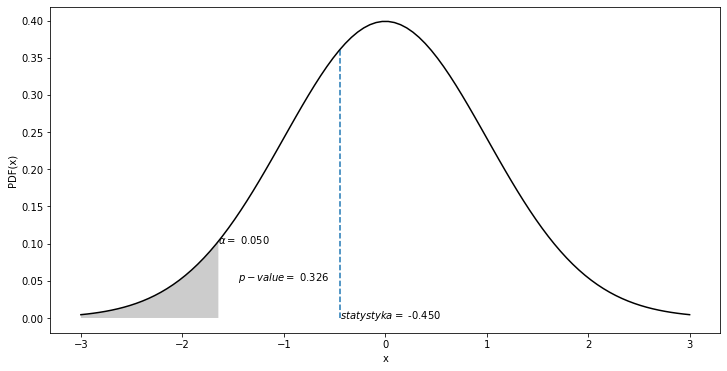

In [24]:
u_1=X.ppf(alpha)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(-3, u_1)
y1 = X.pdf(x1)
figs, axs = plt.subplots(1,1, figsize=(12, 6))
axs.plot(x,yp, 'k')
axs.fill_between(x1, y1, facecolor='#CCCCCC')
#axs.text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs.text(u_1, 0.1, r'$\alpha = $ %.3f' % np.round(alpha,3))
axs.vlines(u, 0, X.pdf(u), linestyles='--')
axs.text(u, 0, r'$statystyka = $ %.3f' % np.round(u,3))
axs.text(u-1.0, 0.05, r'$p-value = $ %.3f' % np.round(p_value,3))
axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')
plt.show()